In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [41]:
DF = pd.read_csv('DF')
DF_SDG = pd.read_csv('DF_SDG_Lee')
DF_SDG2 = pd.read_csv('DF_SDG2')

In [42]:
unique_types_DF = DF['type'].unique()
unique_types_DF_SDG = DF_SDG['type'].unique()
print(unique_types_DF)
print(unique_types_DF_SDG)

['article' 'review' 'book-chapter' 'book' 'preprint' 'dissertation'
 'paratext' 'other' 'report' 'editorial']
['article' 'review' 'book-chapter' 'book' 'preprint' 'report']


**In line with the work of Lee and al(2015), we will apply a log transformation to the number of authors due to the fact that the Novelty has been log transformed. We will also create a vector representing this log_num_authors squared to study a polynamial relation ship  (U reversed) between the Novelty and num_authors. Moreover, since we're going to compare the citation metric to the commonness metric. We'll log-transform the citation variable, as was done in the Commonness metric building.**

In [43]:
#Number of authors
DF['log_num_authors'] = np.log(DF['num_authors'] + 1)
DF['log_num_authors_squared'] = DF['log_num_authors']**2

DF_SDG['num_authors_squared_SDG'] = DF_SDG['num_authors']**2
DF_SDG['log_num_authors_SDG'] = np.log(DF_SDG['num_authors'] + 1)
DF_SDG['log_num_authors_squared_SDG'] = DF_SDG['log_num_authors_SDG']**2

#Metric of citation
DF['log_num_citations'] = np.log(DF['num_citations'] + 1)
DF_SDG['log_num_citations_SDG'] = np.log(DF_SDG['num_citations'] + 1)

In [44]:
DF_SDG2['log_num_citations_SDG'] = np.log(DF_SDG2['num_citations'] + 1)
DF_SDG = pd.concat([DF_SDG, DF_SDG2], ignore_index=True)
DF_SDG = DF_SDG.drop_duplicates()

**Descriptive statistics:**

In [45]:
DF.describe()

,PMID,year,num_citations,num_authors,Novelty,SDG_dummy,log_num_authors,log_num_authors_squared,log_num_citations
count,2.527000e+03,2527.000000,2527.00000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000,2527.000000
mean,5.110118e+07,2016.023744,611.91294,5.535417,-3.499209,0.563910,1.609754,3.006481,5.642044
std,2.929209e+07,4.261660,1410.29717,8.163186,1.882766,0.495997,0.644467,2.552159,1.225520
min,2.199100e+04,2007.000000,17.00000,0.000000,-12.340187,0.000000,0.000000,0.000000,2.890372
25%,2.555286e+07,2013.000000,107.00000,2.000000,-4.488933,0.000000,1.098612,1.206949,4.682131
50%,5.224592e+07,2017.000000,298.00000,4.000000,-3.227289,1.000000,1.609438,2.590290,5.700444
75%,7.685187e+07,2019.000000,677.00000,6.000000,-2.227209,1.000000,1.945910,3.786566,6.519147
max,9.991358e+07,2023.000000,29728.00000,100.000000,0.817186,1.000000,4.615121,21.299337,10.299878


In [46]:
DF_SDG.describe()

,PMID,year,num_citations,num_authors,Novelty,SDG_dummy,num_authors_squared_SDG,log_num_authors_SDG,log_num_authors_squared_SDG,log_num_citations_SDG,predicted_SDG_nov,predicted_SDG_cit,digital_subfield_dum,predicted_SDG_nov2
count,2.314000e+03,2314.000000,2314.000000,2314.000000,2314.000000,1585.000000,2314.000000,2314.000000,2314.000000,2314.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,5.233221e+07,2018.835350,139.784788,5.100691,-3.615778,0.577918,93.419620,1.540318,2.761206,4.384587,-3.645899,4.372046,0.360879,-3.702350
std,2.938864e+07,2.774589,645.142493,8.211681,1.744681,0.494047,705.399613,0.623532,2.490103,0.817673,0.287137,0.163247,0.480438,0.395961
min,1.228150e+05,2007.000000,16.000000,0.000000,-11.799166,0.000000,0.000000,0.000000,0.000000,2.833213,-4.798203,4.261278,0.000000,-5.250154
25%,2.646837e+07,2018.000000,45.000000,2.000000,-4.460324,0.000000,4.000000,1.098612,1.206949,3.828641,-3.853929,4.280351,0.000000,-3.967024
50%,5.502806e+07,2019.000000,68.000000,3.000000,-3.327698,1.000000,9.000000,1.386294,1.921812,4.234107,-3.670582,4.312466,0.000000,-3.663016
75%,7.748256e+07,2020.000000,122.000000,5.000000,-2.378918,1.000000,25.000000,1.791759,3.210402,4.812184,-3.457213,4.383921,1.000000,-3.394755
max,9.980607e+07,2023.000000,23938.000000,100.000000,0.354995,1.000000,10000.000000,4.615121,21.299337,10.083264,-3.126816,5.731016,1.000000,-2.841476


**Let's look at the correlations between our variables:**

In [47]:
DF.corr()

,PMID,year,num_citations,num_authors,Novelty,SDG_dummy,log_num_authors,log_num_authors_squared,log_num_citations
PMID,1.000000,0.004193,0.022022,-0.000328,-0.027966,0.014033,-0.015626,-0.004670,-0.026606
year,0.004193,1.000000,-0.237062,0.067355,0.038540,-0.001280,0.098606,0.082681,-0.483523
num_citations,0.022022,-0.237062,1.000000,0.081276,0.019398,-0.022876,0.054411,0.091630,0.570627
num_authors,-0.000328,0.067355,0.081276,1.000000,0.038328,0.032758,0.772121,0.912487,0.131175
Novelty,-0.027966,0.038540,0.019398,0.038328,1.000000,-0.031218,0.052558,0.046871,0.084826
SDG_dummy,0.014033,-0.001280,-0.022876,0.032758,-0.031218,1.000000,0.068354,0.054622,-0.033938
log_num_authors,-0.015626,0.098606,0.054411,0.772121,0.052558,0.068354,1.000000,0.951496,0.143543
log_num_authors_squared,-0.004670,0.082681,0.091630,0.912487,0.046871,0.054622,0.951496,1.000000,0.163161
log_num_citations,-0.026606,-0.483523,0.570627,0.131175,0.084826,-0.033938,0.143543,0.163161,1.000000


        ->Week correlation between Commonness and log_num_authors, Commonness and log_num_authors_squared 

In [48]:
DF_SDG.corr()

,PMID,year,num_citations,num_authors,Novelty,SDG_dummy,num_authors_squared_SDG,log_num_authors_SDG,log_num_authors_squared_SDG,log_num_citations_SDG,predicted_SDG_nov,predicted_SDG_cit,digital_subfield_dum,predicted_SDG_nov2
PMID,1.000000,0.023464,-0.003954,-0.030633,0.005574,0.059344,-0.030271,-0.038392,-0.029780,-0.064183,-0.046711,-0.030046,0.061091,-0.000361
year,0.023464,1.000000,-0.221279,0.033214,-0.021114,-0.007684,0.010934,0.072097,0.054995,-0.449829,0.088001,0.001518,0.006263,0.080044
num_citations,-0.003954,-0.221279,1.000000,0.028294,0.053807,-0.016787,0.020652,-0.004821,0.023524,0.419364,0.218865,0.303656,-0.004264,0.163423
num_authors,-0.030633,0.033214,0.028294,1.000000,0.069720,0.049149,0.903610,0.766234,0.907215,0.184109,0.465443,0.946361,-0.087970,0.275300
Novelty,0.005574,-0.021114,0.053807,0.069720,1.000000,-0.000700,0.015742,0.152274,0.120541,0.237613,0.175726,0.098020,0.129806,0.224991
SDG_dummy,0.059344,-0.007684,-0.016787,0.049149,-0.000700,1.000000,0.062023,0.020893,0.029882,-0.011905,0.016203,0.032197,-0.038979,-0.012569
num_authors_squared_SDG,-0.030271,0.010934,0.020652,0.903610,0.015742,0.062023,1.000000,0.463365,0.650665,0.117302,0.142526,0.715438,-0.068031,0.025700
log_num_authors_SDG,-0.038392,0.072097,-0.004821,0.766234,0.152274,0.020893,0.463365,1.000000,0.954924,0.201808,0.912141,0.907902,-0.079766,0.670611
log_num_authors_squared_SDG,-0.029780,0.054995,0.023524,0.907215,0.120541,0.029882,0.650665,0.954924,1.000000,0.213256,0.751727,0.990936,-0.088188,0.519868
log_num_citations_SDG,-0.064183,-0.449829,0.419364,0.184109,0.237613,-0.011905,0.117302,0.201808,0.213256,1.000000,0.229488,0.275100,-0.017789,0.166492


        ->Correlation is more important between Commonness and log_num_authors, Commonness and log_num_authors_squared in the SDG table and closer to Lee and al(2015)'s results!

        NB: The correlation found by the latter was closer to 20%.

**Let's take a look at the distribution of Novelty and num_citations and their evolution over time:**

Distribution:

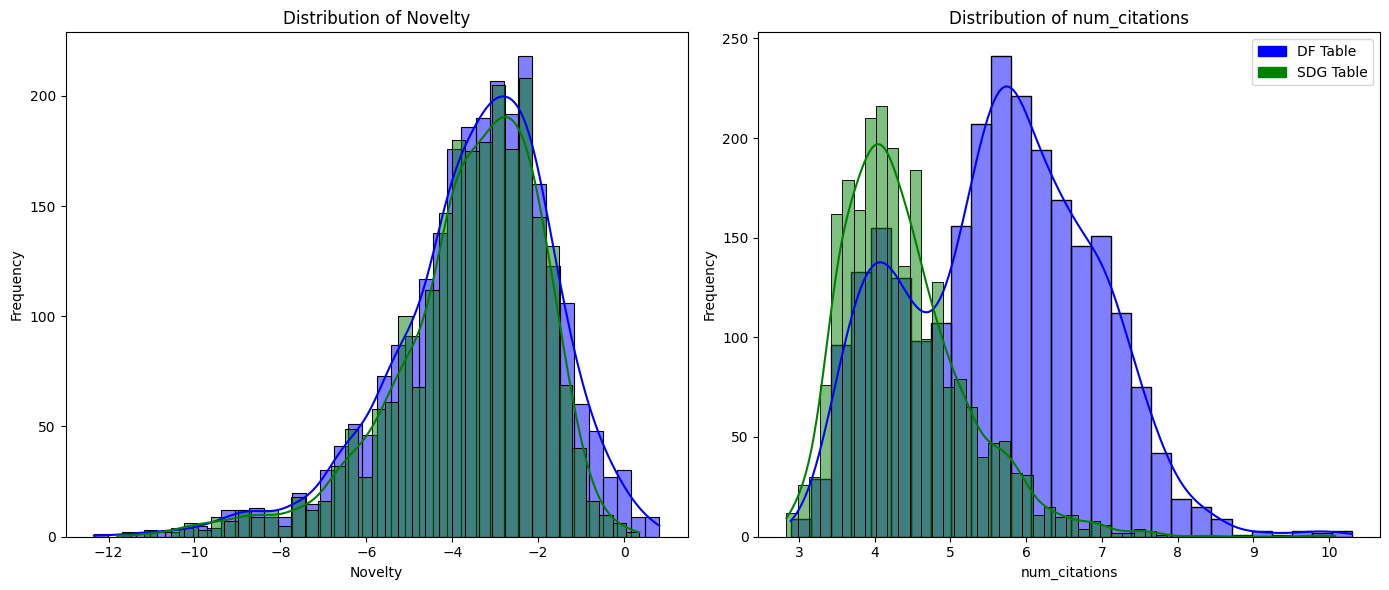

In [49]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(DF['Novelty'], kde=True, color='blue')
sns.histplot(DF_SDG['Novelty'], kde=True, color='green')
plt.xlabel('Novelty')
plt.ylabel('Frequency')
plt.title('Distribution of Novelty')

plt.subplot(1, 2, 2)
sns.histplot(DF['log_num_citations'], kde=True, color='blue')
sns.histplot(DF_SDG['log_num_citations_SDG'], kde=True, color='green')
plt.xlabel('num_citations')
plt.ylabel('Frequency')
plt.title('Distribution of num_citations')

blue_patch = mpatches.Patch(color='blue', label='DF Table')
green_patch = mpatches.Patch(color='green', label='SDG Table')

plt.legend(handles=[blue_patch, green_patch], loc='upper right')

plt.tight_layout()
plt.show()

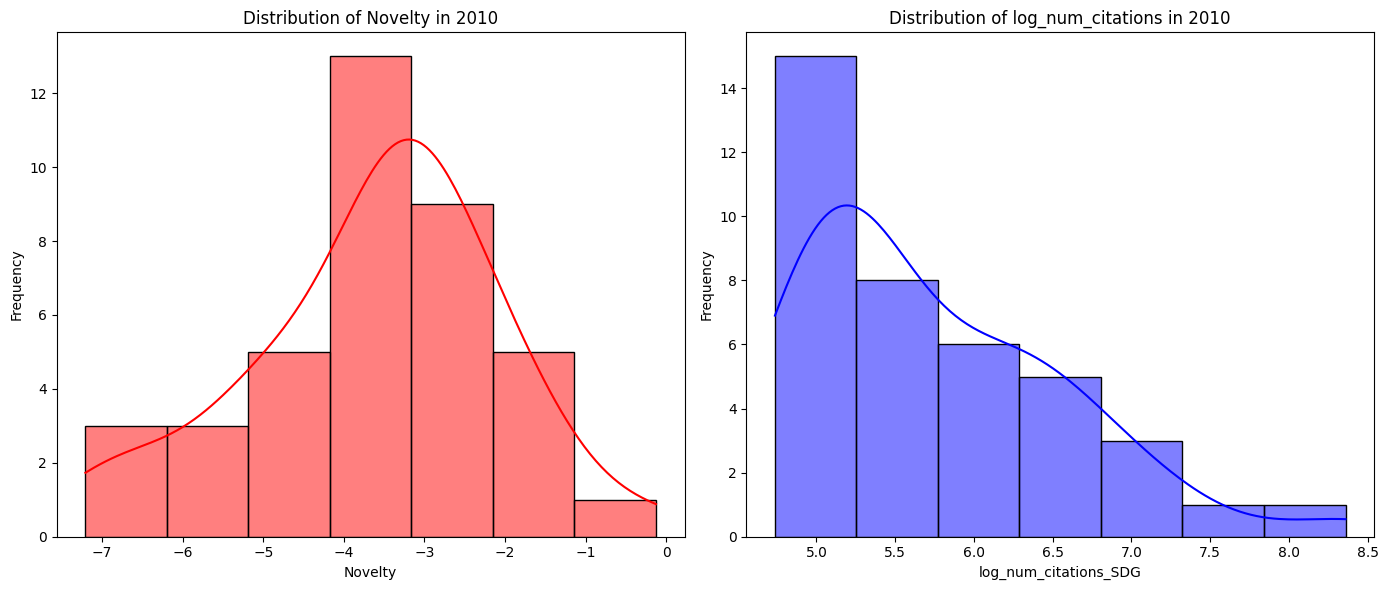

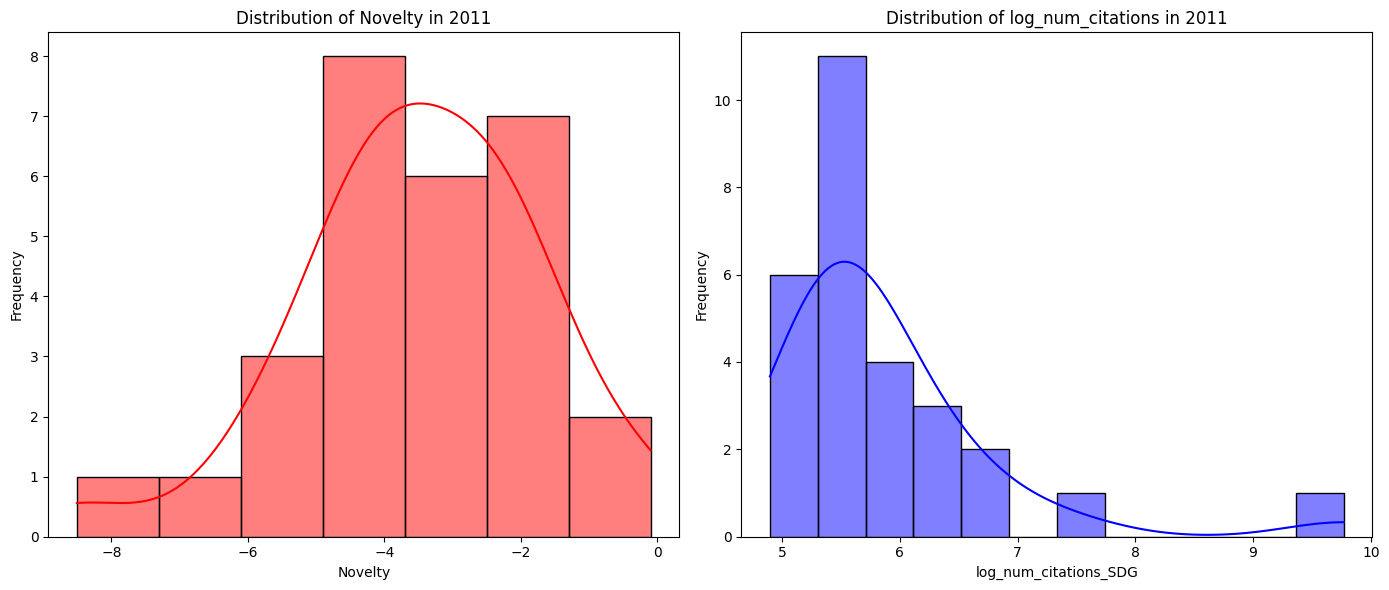

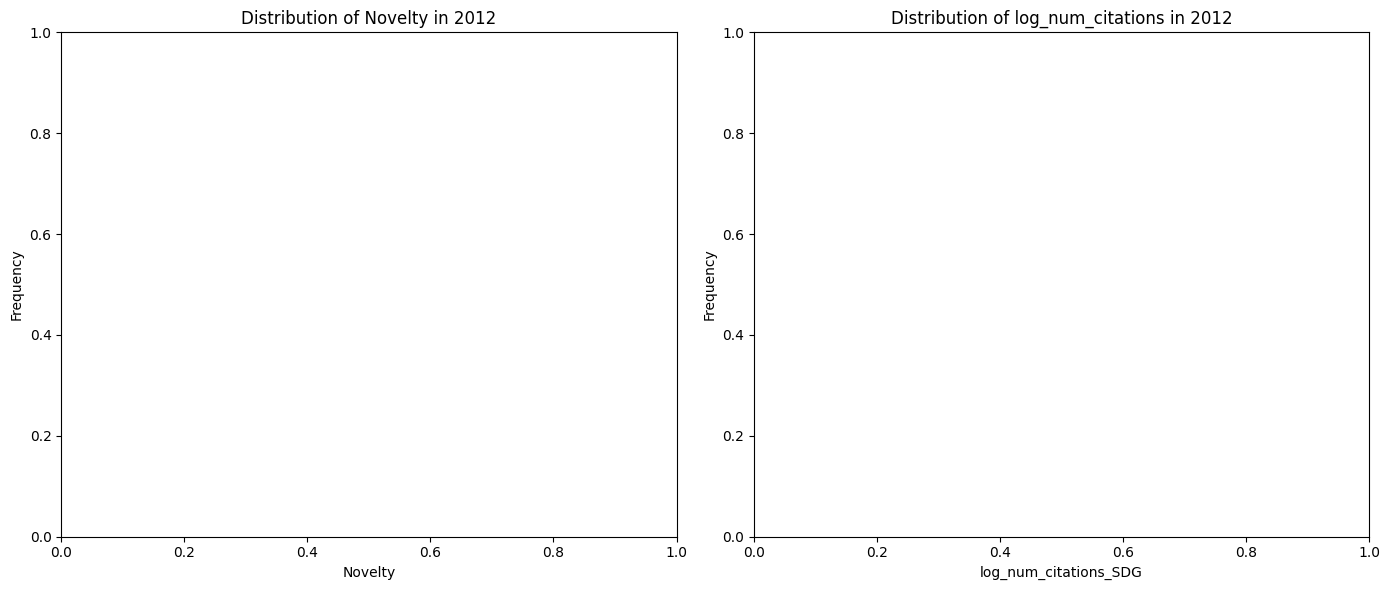

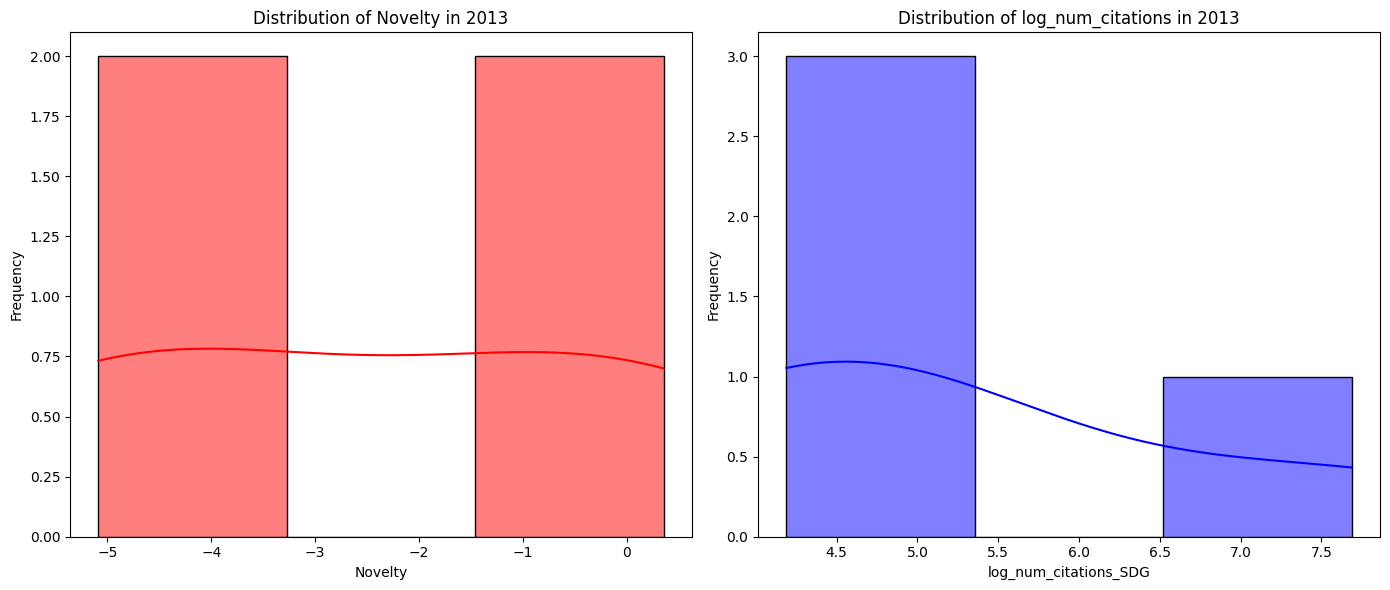

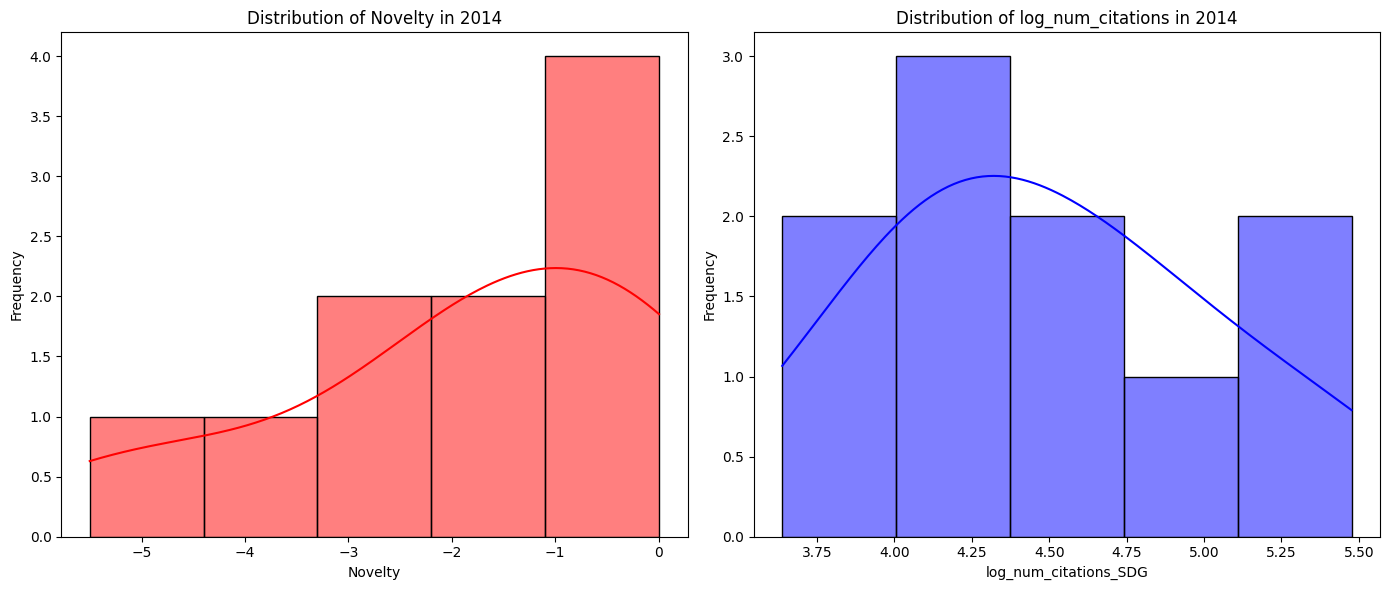

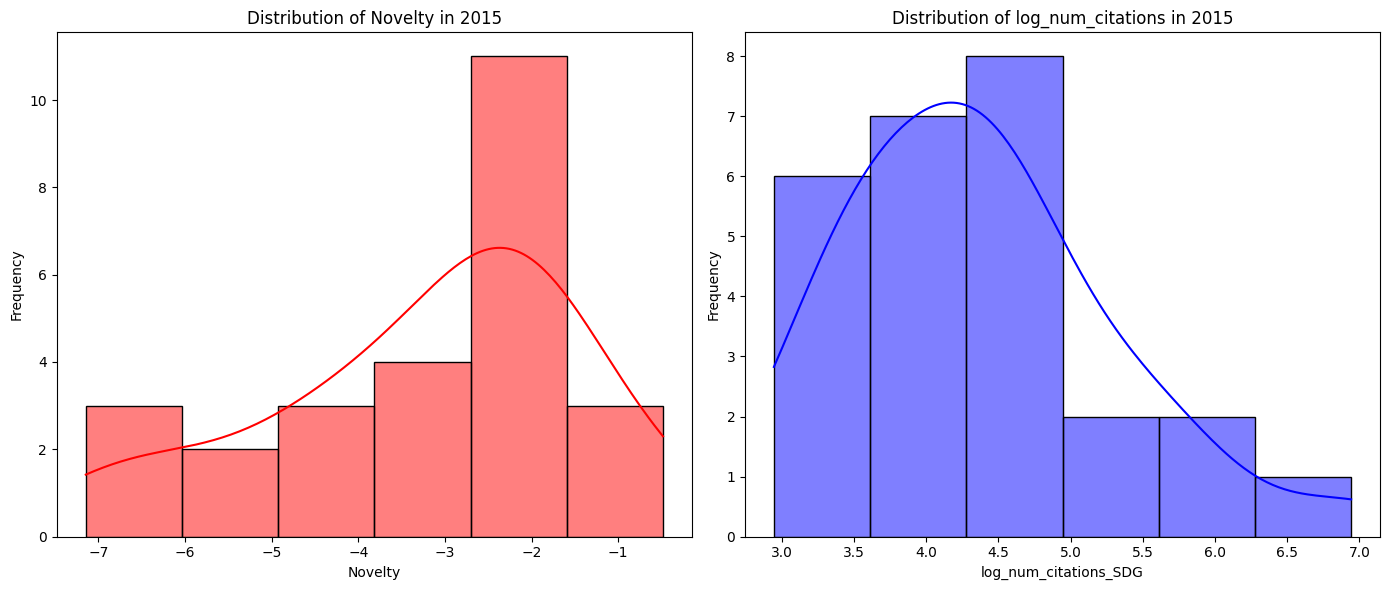

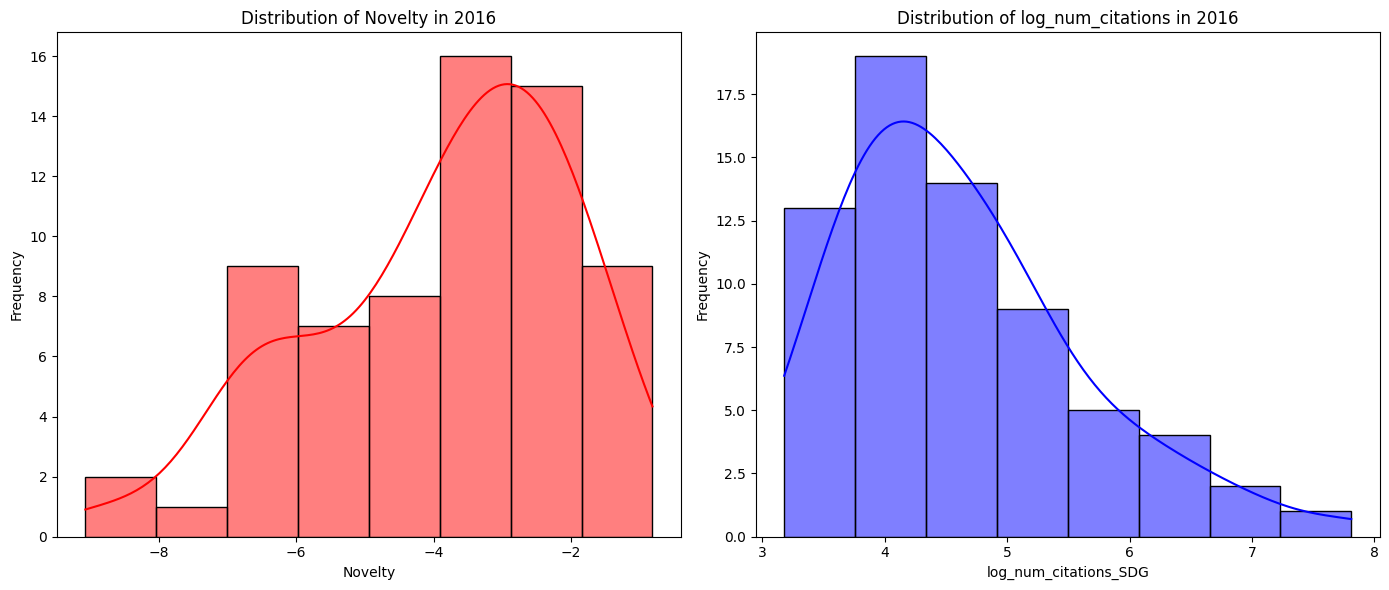

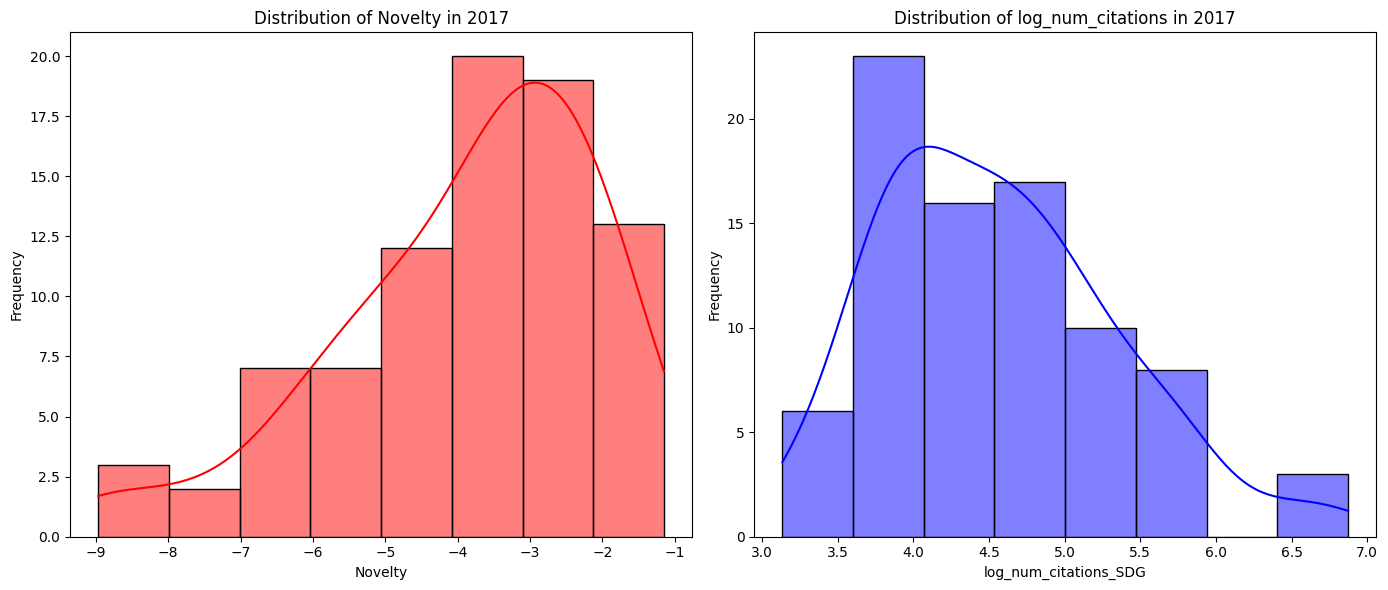

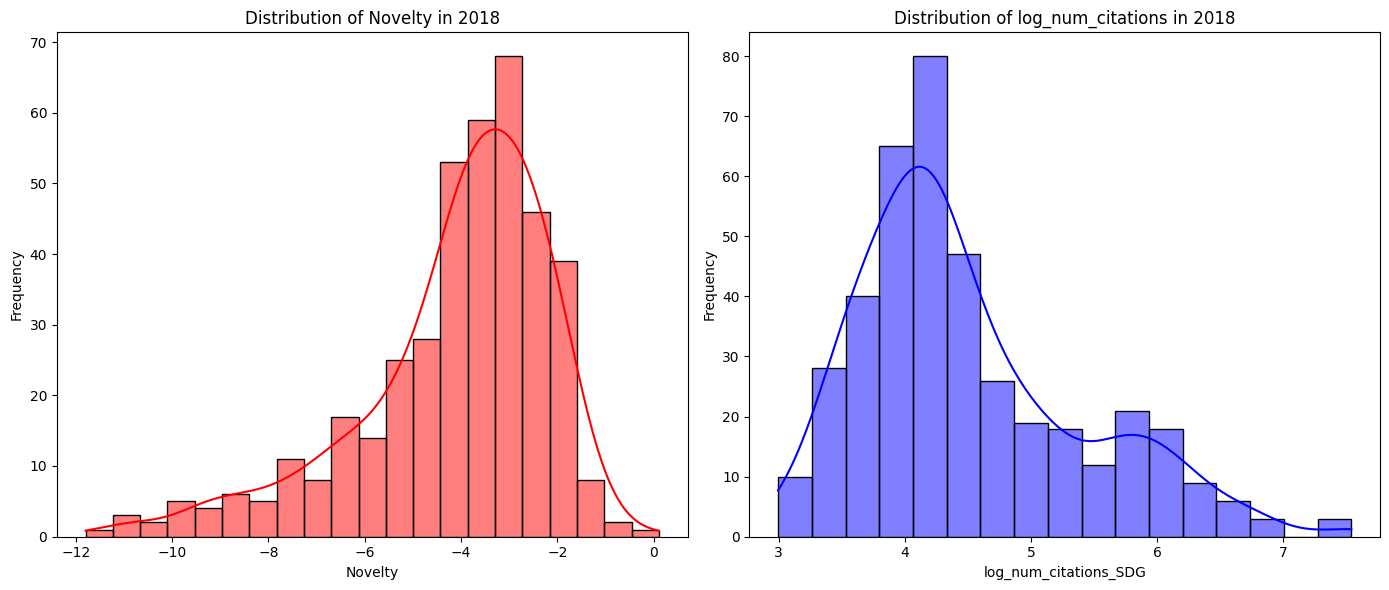

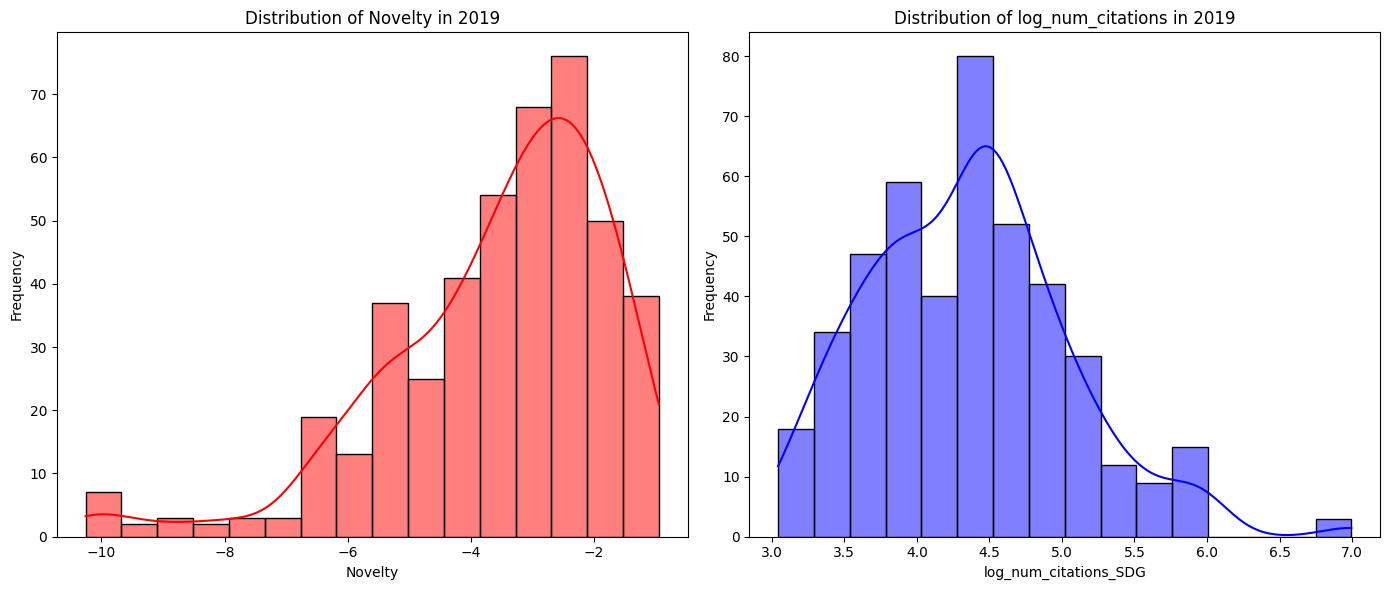

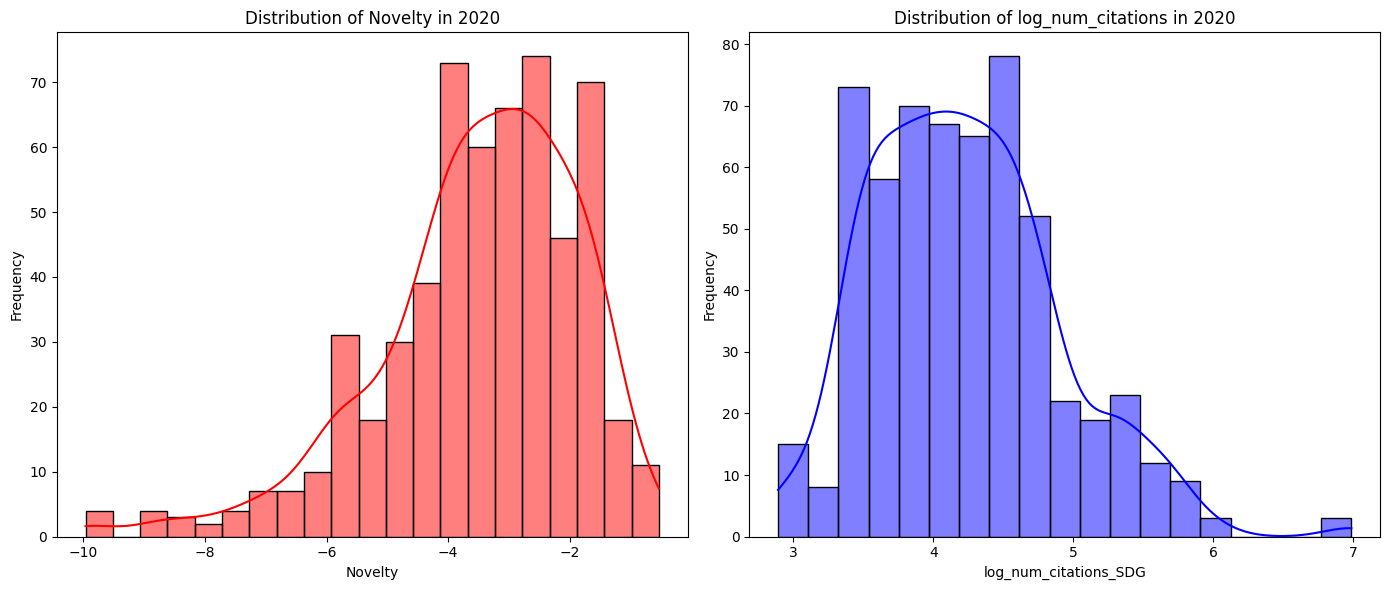

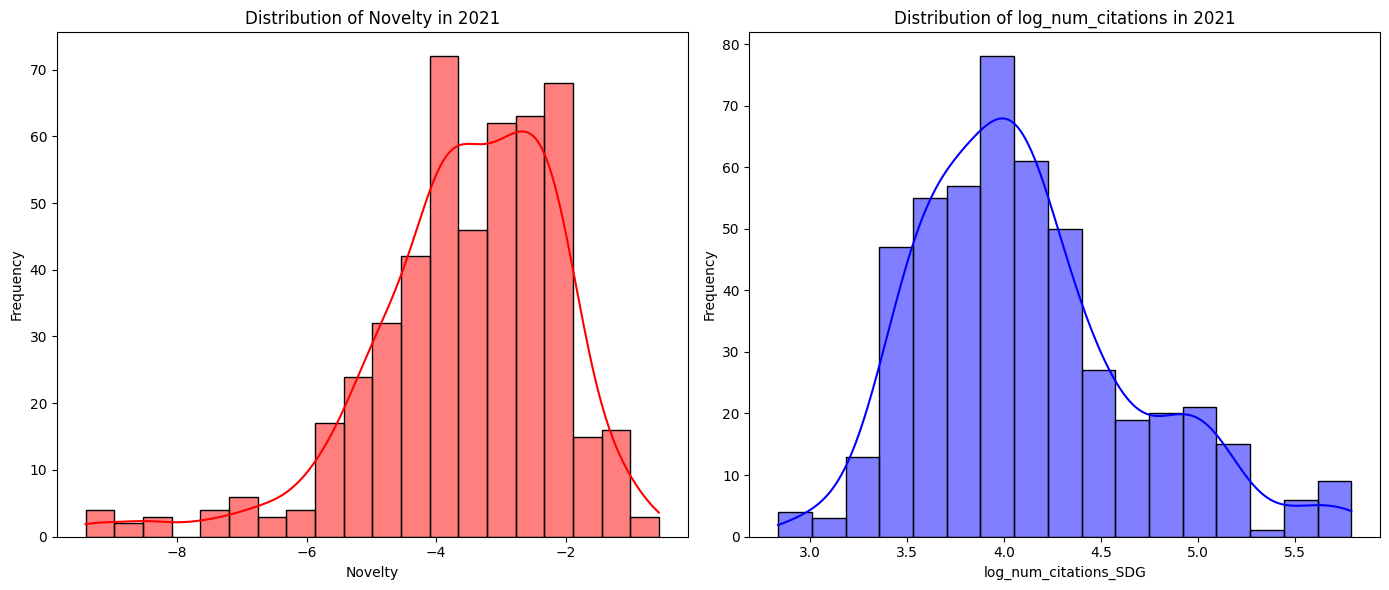

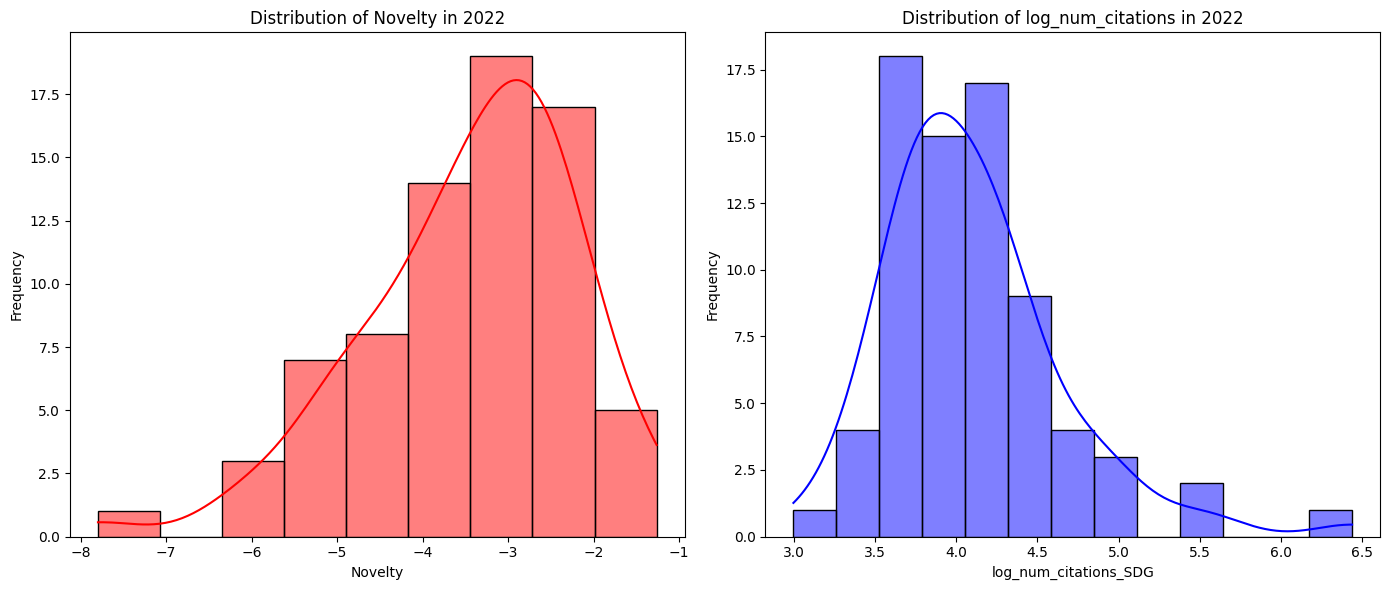

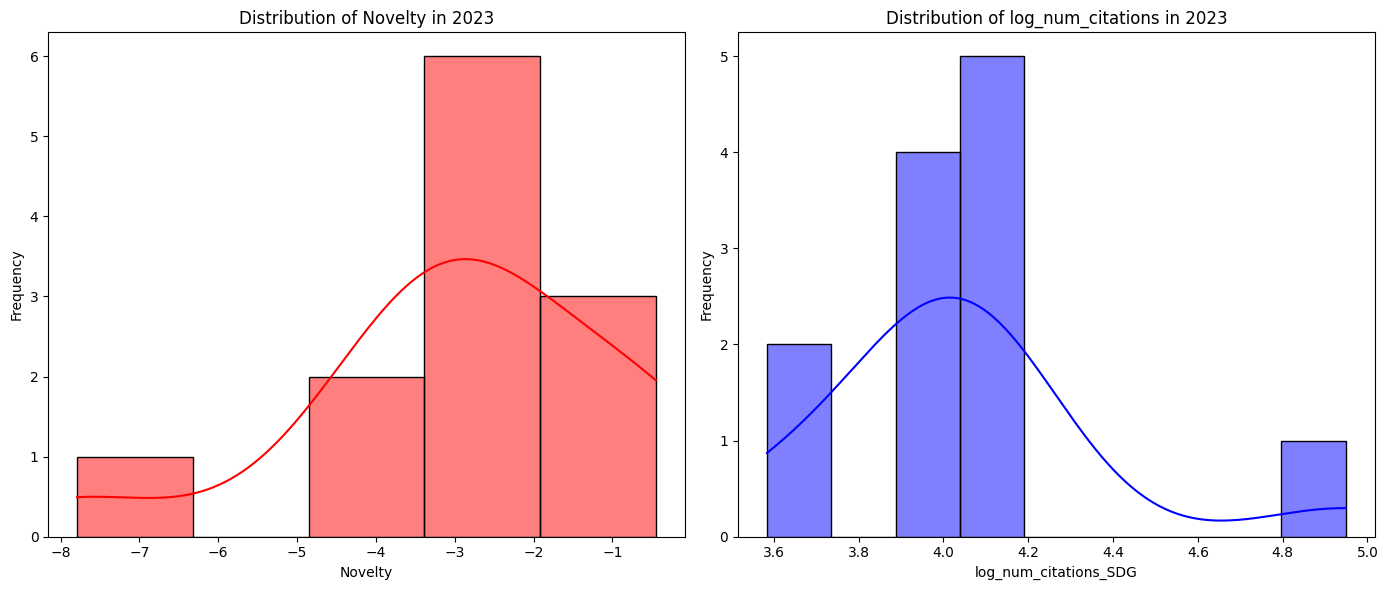

In [50]:
years = range(2010, 2024)

for year in years:
    DF_SDG_year = DF_SDG[DF_SDG['year'] == year]

    plt.figure(figsize=(14, 6))
    
    # First subplot
    plt.subplot(1, 2, 1)
    sns.histplot(DF_SDG_year['Novelty'], kde=True, color='red')
    plt.xlabel('Novelty')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Novelty in {year}')
    
    # Second subplot
    plt.subplot(1, 2, 2)
    sns.histplot(DF_SDG_year['log_num_citations_SDG'], kde=True, color='blue')
    plt.xlabel('log_num_citations_SDG')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of log_num_citations in {year}')
    
    
    plt.tight_layout()
    plt.show()

Number of observations by year:

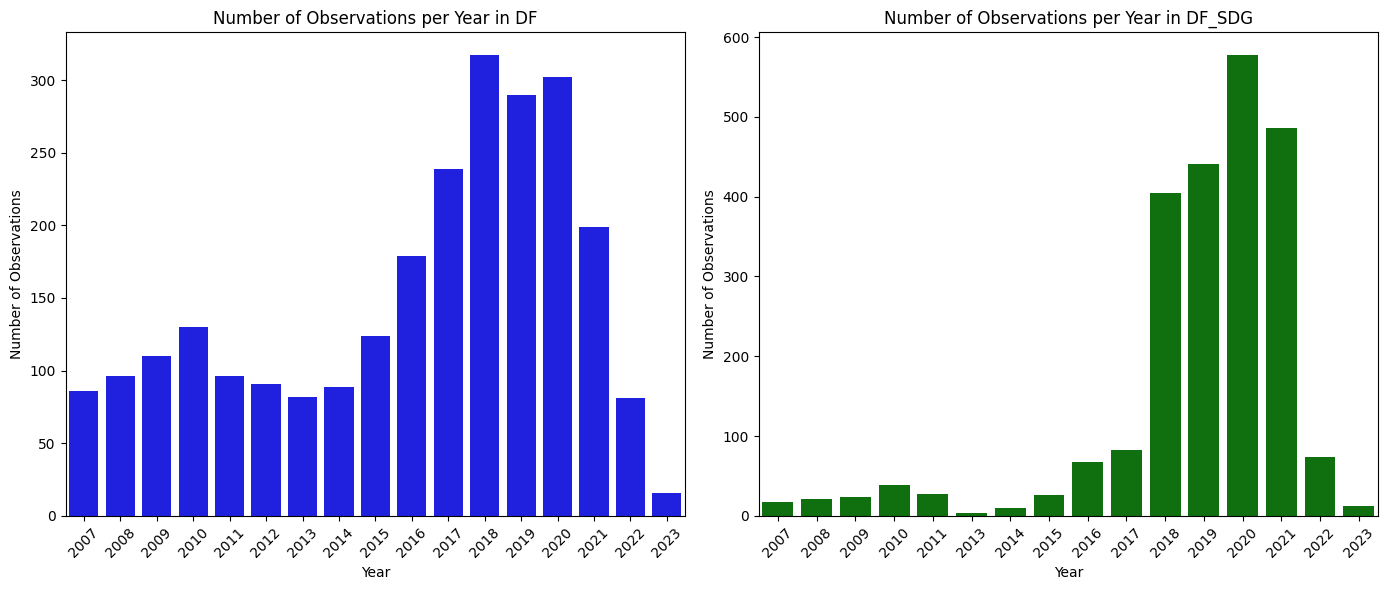

In [51]:
observations_per_year_DF = DF.groupby('year').size().reset_index(name='counts')
observations_per_year_SDG = DF_SDG.groupby('year').size().reset_index(name='counts')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='year', y='counts', data=observations_per_year_DF, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per Year in DF')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='year', y='counts', data=observations_per_year_SDG, color='green')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per Year in DF_SDG')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Evolution over time (annuel mean):

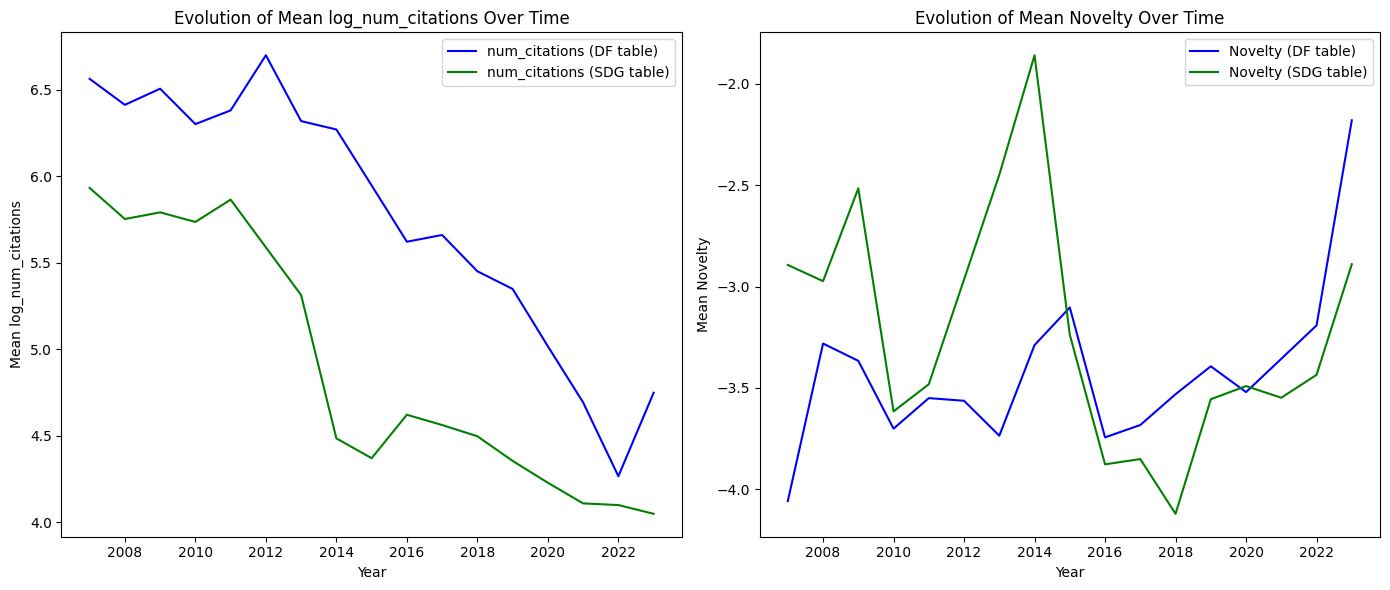

In [70]:
# Calculation of annual mean
mean_citations_per_year_DF = DF.groupby('year')['log_num_citations'].mean().reset_index()
mean_citations_per_year_SDG = DF_SDG.groupby('year')['log_num_citations_SDG'].mean().reset_index()
mean_Novelty_per_year_DF = DF.groupby('year')['Novelty'].mean().reset_index()
mean_Novelty_per_year_SDG = DF_SDG.groupby('year')['Novelty'].mean().reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='log_num_citations', data=mean_citations_per_year_DF, color='blue', label='num_citations (DF table)')
sns.lineplot(x='year', y='log_num_citations_SDG', data=mean_citations_per_year_SDG, color='green', label='num_citations (SDG table)')
plt.xlabel('Year')
plt.ylabel('Mean log_num_citations')
plt.title('Evolution of Mean log_num_citations Over Time')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x='year', y='Novelty', data=mean_Novelty_per_year_DF, color='blue', label='Novelty (DF table)')
sns.lineplot(x='year', y='Novelty', data=mean_Novelty_per_year_SDG, color='green', label='Novelty (SDG table)')
plt.xlabel('Year')
plt.ylabel('Mean Novelty')
plt.title('Evolution of Mean Novelty Over Time')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
Y_DF_nov = DF['Novelty']
Y_DF_cit = DF['log_num_citations']
X_DF = DF[['log_num_authors','log_num_authors_squared']]
X_DF = sm.add_constant(X_DF)

Y_SDG_nov = DF_SDG['Novelty']
Y_SDG_cit = DF_SDG['log_num_citations_SDG']
X_SDG = DF_SDG[['log_num_authors_SDG','log_num_authors_squared_SDG']]
X_SDG = sm.add_constant(X_SDG)

In [54]:
model_DF_nov = sm.OLS(Y_DF_nov, X_DF).fit(cov_type='HC3')
DF['predicted_DF_nov'] = model_DF_nov.predict(X_DF)

model_DF_cit = sm.OLS(Y_DF_cit, X_DF).fit(cov_type='HC3')
DF['predicted_DF_cit'] = model_DF_cit.predict(X_DF)

model_SDG_nov = sm.OLS(Y_SDG_nov, X_SDG).fit(cov_type='HC3')
DF_SDG['predicted_SDG_nov'] = model_SDG_nov.predict(X_SDG)

model_SDG_cit = sm.OLS(Y_SDG_cit, X_SDG).fit(cov_type='HC3')
DF_SDG['predicted_SDG_cit'] = model_SDG_cit.predict(X_SDG)

In [55]:
model_DF_nov.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Novelty   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.953
Date:                Sun, 02 Jun 2024   Prob (F-statistic):             0.0524
Time:                        14:39:47   Log-Likelihood:                -5180.5
No. Observations:                2527   AIC:                         1.037e+04
Df Residuals:                    2524   BIC:                         1.038e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.8212      0.228    -16.745      0.000      -4.268      -3.374
log_num_authors             0.2457      0.228      1.079      0.280      -0.200       0.692
log_num_authors_squared    -0.0245      0.053     -0.463      0.643      -0.128       0.079
==============================================================================
Omnibus:                      302.158   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.638
Skew:                          -0.845   Prob(JB):                    2.33e-103
Kurtosis:                       4.279   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

        -> Not significant results in this table containing papers from several queries (for 2,527 obs.)

In [56]:
model_DF_cit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_num_citations   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     28.72
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           4.63e-13
Time:                        14:39:47   Log-Likelihood:                -4063.1
No. Observations:                2527   AIC:                             8132.
Df Residuals:                    2524   BIC:                             8150.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.6151      0.144     38.950      0.000       5.333       5.898
log_num_authors            -0.2351      0.152     -1.545      0.122      -0.533       0.063
log_num_authors_squared     0.1348      0.038      3.539      0.000       0.060       0.210
==============================================================================
Omnibus:                       23.809   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.884
Skew:                           0.079   Prob(JB):                     0.000216
Kurtosis:                       2.632   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [57]:
model_SDG_nov.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Novelty   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     28.49
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           6.01e-13
Time:                        14:39:47   Log-Likelihood:                -4535.3
No. Observations:                2314   AIC:                             9077.
Df Residuals:                    2311   BIC:                             9094.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.8876      0.202    -24.200      0.000      -5.283      -4.492
log_num_authors_SDG             1.1801      0.199      5.944      0.000       0.791       1.569
log_num_authors_squared_SDG    -0.1977      0.044     -4.542      0.000      -0.283      -0.112
==============================================================================
Omnibus:                      382.072   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.541
Skew:                          -1.052   Prob(JB):                    6.73e-146
Kurtosis:                       4.582   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

        -> Significant results in this table containing papers from SDG query (for 995 obs.)

In [58]:
model_SDG_cit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_num_citations_SDG   R-squared:                       0.046
Model:                               OLS   Adj. R-squared:                  0.045
Method:                    Least Squares   F-statistic:                     41.77
Date:                   Sun, 02 Jun 2024   Prob (F-statistic):           1.52e-18
Time:                           14:39:47   Log-Likelihood:                -2763.2
No. Observations:                   2314   AIC:                             5532.
Df Residuals:                       2311   BIC:                             5550.
Df Model:                              2                                         
Covariance Type:                     HC3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.2153      0.107     39.487      0.000       4.006       4.424
log_num_authors_SDG            -0.0273      0.113     -0.241      0.810      -0.250       0.195
log_num_authors_squared_SDG     0.0766      0.028      2.764      0.006       0.022       0.131
==============================================================================
Omnibus:                      550.490   Durbin-Watson:                   0.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1592.165
Skew:                           1.222   Prob(JB):                         0.00
Kurtosis:                       6.246   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

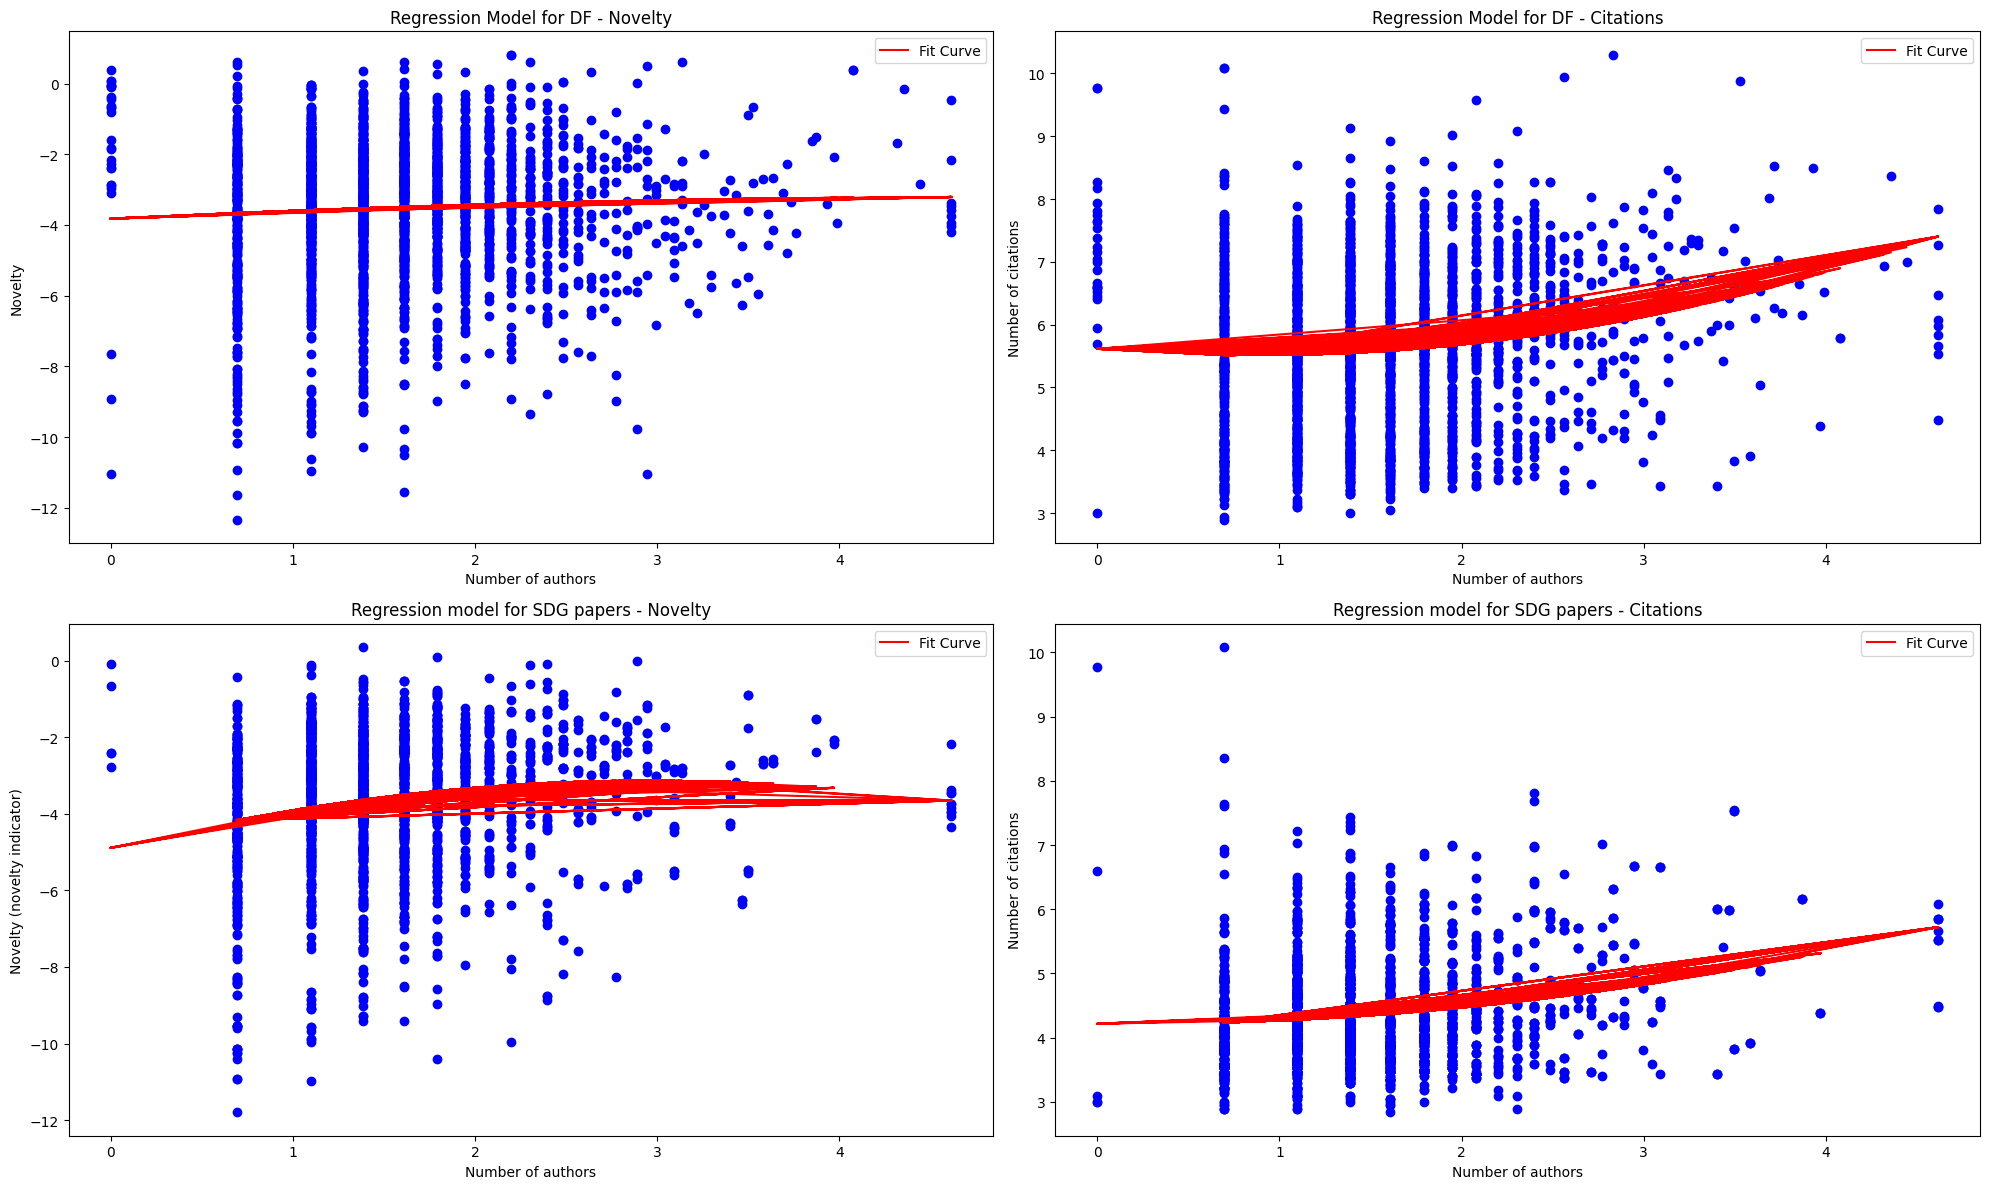

In [59]:
# Creating a figure with 4 subplots
plt.figure(figsize=(20, 12))

# First subplot: DF Novelty
plt.subplot(2, 2, 1)
plt.scatter(DF['log_num_authors'], DF['Novelty'], color='blue')
plt.plot(DF['log_num_authors'], DF['predicted_DF_nov'], color='red', label='Fit Curve')
plt.xlabel('Number of authors')
plt.ylabel('Novelty')
plt.title('Regression Model for DF - Novelty')
plt.legend()

# Second subplot: DF Citations
plt.subplot(2, 2, 2)
plt.scatter(DF['log_num_authors'], DF['log_num_citations'], color='blue')
plt.plot(DF['log_num_authors'], DF['predicted_DF_cit'], color='red', label='Fit Curve')
plt.xlabel('Number of authors')
plt.ylabel('Number of citations')
plt.title('Regression Model for DF - Citations')
plt.legend()

# Third subplot: SDG Novelty
plt.subplot(2, 2, 3)
plt.scatter(DF_SDG['log_num_authors_SDG'], DF_SDG['Novelty'], color='blue')
plt.plot(DF_SDG['log_num_authors_SDG'], DF_SDG['predicted_SDG_nov'], color='red', label='Fit Curve')
plt.xlabel("Number of authors")
plt.ylabel('Novelty (novelty indicator)')
plt.title('Regression model for SDG papers - Novelty')
plt.legend()

# Fourth subplot: SDG Citations
plt.subplot(2, 2, 4)
plt.scatter(DF_SDG['log_num_authors_SDG'], DF_SDG['log_num_citations_SDG'], color='blue')
plt.plot(DF_SDG['log_num_authors_SDG'], DF_SDG['predicted_SDG_cit'], color='red', label='Fit Curve')
plt.xlabel("Number of authors")
plt.ylabel('Number of citations')
plt.title('Regression model for SDG papers - Citations')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
#Calculate the pairing that maximizes the Novelty function, number of authors
b0 = model_SDG_nov.params['const']
b1 = model_SDG_nov.params['log_num_authors_SDG']
b2 = model_SDG_nov.params['log_num_authors_squared_SDG']

log_num_authors_SDG_max = b1 / (-2 * b2)

Novelty_max = b0 + b1 * log_num_authors_SDG_max + b2 * log_num_authors_SDG_max**2

print(f'The corresponding maximum torque is ({log_num_authors_SDG_max:.4f}, {Novelty_max:.4f})')


The corresponding maximum torque is (2.9842, -3.1267)


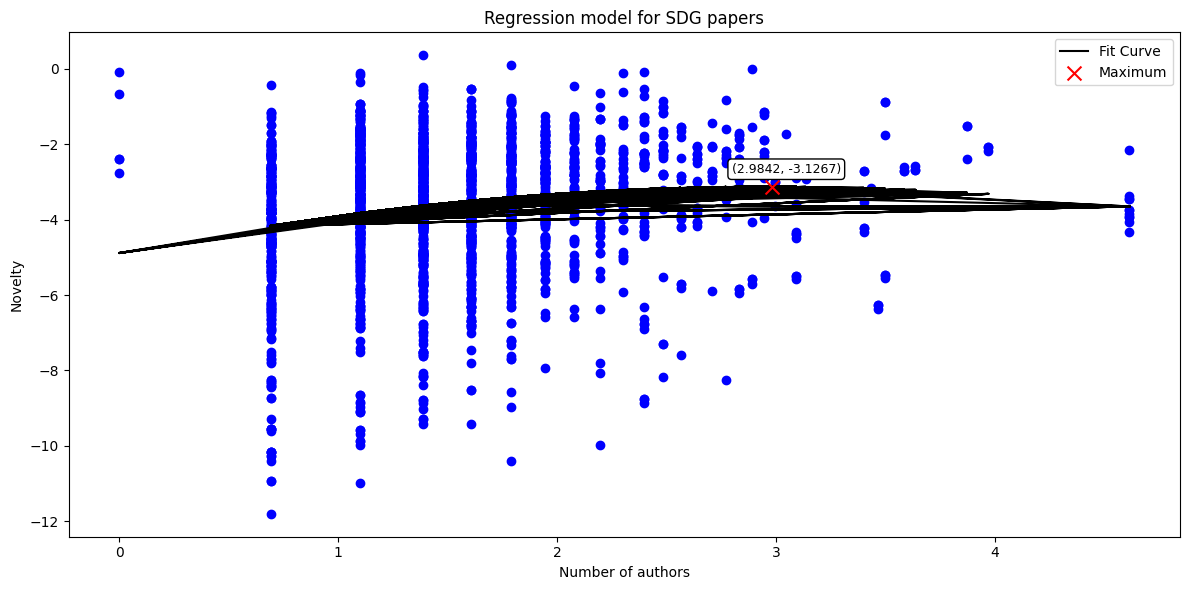

In [61]:
#Ploting to show polynomial relation between Novelty and number of authors (observations, fit curve and maximum)
plt.figure(figsize=(12, 6))

plt.scatter(DF_SDG['log_num_authors_SDG'], DF_SDG['Novelty'], color='blue')
plt.plot(DF_SDG['log_num_authors_SDG'], DF_SDG['predicted_SDG_nov'], color='black', label='Fit Curve')
plt.scatter(log_num_authors_SDG_max, Novelty_max, color='red', s=100, marker='x', zorder=5, label='Maximum')

plt.annotate(f'({log_num_authors_SDG_max:.4f}, {Novelty_max:.4f})', 
             (log_num_authors_SDG_max, Novelty_max), 
             textcoords="offset points", 
             xytext=(10,10),  
             ha='center', 
             fontsize=9, 
             color='black',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.xlabel("Number of authors")
plt.ylabel('Novelty')
plt.title('Regression model for SDG papers')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:

Digital_technology_subfield = ['computer', 'machine', 'artificial intelligence', 'AI', 'deep learning',
            'data science', 'algorithm', 'neural network', 'internet', 'IoT', 'blockchain',
            'cryptocurrency', 'robotics', 'software', 'hardaware', 'programming', 'digital', 'big data',
            'cybersecurity', 'information technology', 'ICT', 'Sentiment analysis']

DF_SDG['digital_subfield_dum'] = DF_SDG['subfield'].apply(
    lambda x: 1 if any(keyword.lower() in x.lower() for keyword in Digital_technology_subfield) else 0
)

Let's see the results for articles between 2018 and 2021 with an interaction term

In [63]:
DF_SDG_bis = DF_SDG[(DF_SDG['year'] >= 2018) & (DF_SDG['year'] <= 2021) & (DF_SDG['type'] == 'article')].copy()

#Apply logarithmic transformation to num_authors variables
DF_SDG_bis['log_num_authors2'] = np.log(DF_SDG_bis['num_authors'] + 1)
DF_SDG_bis['log_num_authors_squared2'] = DF_SDG_bis['log_num_authors2'] ** 2

DF_SDG_bis['log_num_citations2'] = np.log(DF_SDG_bis['num_citations'] + 1)

#Create the interaction terme
DF_SDG_bis['interaction'] = DF_SDG_bis['log_num_authors2'] * DF_SDG_bis['digital_subfield_dum']

X_SDG = DF_SDG_bis[['log_num_authors2', 'log_num_authors_squared2', 'digital_subfield_dum', 'interaction']]
X_SDG = sm.add_constant(X_SDG)

Y_SDG_nov = DF_SDG_bis['Novelty']

model_SDG_nov2 = sm.OLS(Y_SDG_nov, X_SDG).fit(cov_type='HC3')

print(model_SDG_nov2.summary())

#Predicting the optimal number of authors to maximize Novelty

#Extraction of coef
beta_1 = model_SDG_nov2.params['log_num_authors2']
beta_2 = model_SDG_nov2.params['log_num_authors_squared2']
beta_4 = model_SDG_nov2.params['interaction']

# Case 1 : Articles dont discuss about digital technologies
log_num_authors_optimal_non_digital = beta_1 / (2 * -beta_2)
num_authors_optimal_non_digital = np.exp(log_num_authors_optimal_non_digital) - 1 #Taking into account the log-transformation

# Case 2 : articles on digital technology
log_num_authors_optimal_digital = (beta_1 + beta_4) / (2 * -beta_2)
num_authors_optimal_digital = np.exp(log_num_authors_optimal_digital) - 1#Taking into account the log-transformation

print("Nombre d'auteurs optimal pour les articles ne discutant pas de la technologie numérique :", num_authors_optimal_non_digital)
print("Nombre d'auteurs optimal pour les articles discutant de la technologie numérique :", num_authors_optimal_digital)

                            OLS Regression Results                            
Dep. Variable:                Novelty   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     33.03
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.28e-26
Time:                        14:39:49   Log-Likelihood:                -3481.2
No. Observations:                1804   AIC:                             6972.
Df Residuals:                    1799   BIC:                             7000.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [64]:


DF_SDG_bis['interaction'] = DF_SDG_bis['log_num_authors2'] * DF_SDG_bis['digital_subfield_dum']
X_SDG = DF_SDG_bis[['log_num_authors2', 'log_num_authors_squared2', 'digital_subfield_dum', 'interaction']]


Y_SDG_nov = DF_SDG_bis['Novelty']

model_SDG_nov2 = sm.OLS(Y_SDG_nov, X_SDG).fit(cov_type='HC3')

print(model_SDG_nov2.summary())

beta_1 = model_SDG_nov2.params['log_num_authors2']
beta_2 = model_SDG_nov2.params['log_num_authors_squared2']
beta_4 = model_SDG_nov2.params['interaction']

print("Nombre d'auteurs optimal pour les articles ne discutant pas de la technologie numérique :", num_authors_optimal_non_digital)
print("Nombre d'auteurs optimal pour les articles discutant de la technologie numérique :", num_authors_optimal_digital)

                                 OLS Regression Results                                
Dep. Variable:                Novelty   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              1955.
Date:                Sun, 02 Jun 2024   Prob (F-statistic):                        0.00
Time:                        14:39:49   Log-Likelihood:                         -3674.3
No. Observations:                1804   AIC:                                      7357.
Df Residuals:                    1800   BIC:                                      7379.
Df Model:                           4                                                  
Covariance Type:                  HC3                                                  
                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

        -> No intercept, curve takes on a different trend (sign inversion)

In [65]:
DF_SDG_bis['log_num_authors2'] = np.log(DF_SDG_bis['num_authors'] + 1)
DF_SDG_bis['log_num_authors_squared2'] = DF_SDG_bis['log_num_authors2'] ** 2

DF_SDG_bis['interaction'] = DF_SDG_bis['log_num_authors2'] * DF_SDG_bis['digital_subfield_dum']

X_SDG = DF_SDG_bis[['log_num_authors2', 'log_num_authors_squared2', 'digital_subfield_dum']]
X_SDG = sm.add_constant(X_SDG)

Y_SDG_nov = DF_SDG_bis['Novelty']

model_SDG_nov2 = sm.OLS(Y_SDG_nov, X_SDG).fit(cov_type='HC3')

print(model_SDG_nov2.summary())

beta_1 = model_SDG_nov2.params['log_num_authors2']
beta_2 = model_SDG_nov2.params['log_num_authors_squared2']

log_num_authors_optimal_non_digital = beta_1 / (2 * -beta_2)
num_authors_optimal_non_digital = np.exp(log_num_authors_optimal_non_digital) - 1

print("Nombre d'auteurs optimal pour les articles ne discutant pas de la technologie numérique :", num_authors_optimal_non_digital)

                            OLS Regression Results                            
Dep. Variable:                Novelty   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     33.19
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           7.05e-21
Time:                        14:39:49   Log-Likelihood:                -3482.6
No. Observations:                1804   AIC:                             6973.
Df Residuals:                    1800   BIC:                             6995.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [66]:
DF_SDG_bis['interaction'] = DF_SDG_bis['log_num_authors2'] * DF_SDG_bis['digital_subfield_dum']

X_SDG = DF_SDG_bis[['log_num_authors2', 'log_num_authors_squared2']]
X_SDG = sm.add_constant(X_SDG)

Y_SDG_nov = DF_SDG_bis['Novelty']

model_SDG_nov2 = sm.OLS(Y_SDG_nov, X_SDG).fit(cov_type='HC3')

print(model_SDG_nov2.summary())

beta_1 = model_SDG_nov2.params['log_num_authors2']
beta_2 = model_SDG_nov2.params['log_num_authors_squared2']

log_num_authors_optimal_non_digital = beta_1 / (2 * -beta_2)
num_authors_optimal_non_digital = np.exp(log_num_authors_optimal_non_digital) - 1

print("Nombre d'auteurs optimal pour les articles ne discutant pas de la technologie numérique :", num_authors_optimal_non_digital)

                            OLS Regression Results                            
Dep. Variable:                Novelty   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     23.49
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           8.53e-11
Time:                        14:39:49   Log-Likelihood:                -3506.8
No. Observations:                1804   AIC:                             7020.
Df Residuals:                    1801   BIC:                             7036.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [67]:
DF_SDG_bis['log_num_authors2'] = np.log(DF_SDG_bis['num_authors'] + 1)
DF_SDG_bis['log_num_authors_squared2'] = DF_SDG_bis['log_num_authors2'] ** 2

DF_SDG_bis['interaction'] = DF_SDG_bis['log_num_authors2'] * DF_SDG_bis['digital_subfield_dum']

X_SDG = DF_SDG_bis[['log_num_authors2', 'log_num_authors_squared2']]

Y_SDG_nov = DF_SDG_bis['Novelty']

model_SDG_nov2 = sm.OLS(Y_SDG_nov, X_SDG).fit(cov_type='HC3')

print(model_SDG_nov2.summary())

                                 OLS Regression Results                                
Dep. Variable:                Novelty   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              3572.
Date:                Sun, 02 Jun 2024   Prob (F-statistic):                        0.00
Time:                        14:39:49   Log-Likelihood:                         -3759.8
No. Observations:                1804   AIC:                                      7524.
Df Residuals:                    1802   BIC:                                      7535.
Df Model:                           2                                                  
Covariance Type:                  HC3                                                  
                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

In [68]:
DF_SDG_bis = DF_SDG[(DF_SDG['year'] >= 2018) & (DF_SDG['year'] <= 2021) & (DF_SDG['type'] == 'article')].copy()

DF_SDG_bis['log_num_authors2'] = np.log(DF_SDG_bis['num_authors'] + 1)
DF_SDG_bis['log_num_authors_squared2'] = DF_SDG_bis['log_num_authors2'] ** 2

DF_SDG_bis['log_num_citations2'] = np.log(DF_SDG_bis['num_citations'] + 1)

DF_SDG_bis['interaction'] = DF_SDG_bis['log_num_authors2'] * DF_SDG_bis['digital_subfield_dum']

X_SDG = DF_SDG_bis[['log_num_authors2', 'log_num_authors_squared2', 'digital_subfield_dum', 'interaction']]
X_SDG = sm.add_constant(X_SDG)


Y_SDG_nov = DF_SDG_bis['Novelty']


model_SDG_nov2 = sm.OLS(Y_SDG_nov, X_SDG).fit(cov_type='HC3')


print(model_SDG_nov2.summary())

beta_1 = model_SDG_nov2.params['log_num_authors2']
beta_2 = model_SDG_nov2.params['log_num_authors_squared2']
beta_4 = model_SDG_nov2.params['interaction']

log_num_authors_optimal_non_digital = beta_1 / (2 * -beta_2)
num_authors_optimal_non_digital = np.exp(log_num_authors_optimal_non_digital) - 1

log_num_authors_optimal_digital = (beta_1 + beta_4) / (2 * -beta_2)
num_authors_optimal_digital = np.exp(log_num_authors_optimal_digital) - 1

print("Nombre d'auteurs optimal pour les articles ne discutant pas de la technologie numérique :", num_authors_optimal_non_digital)
print("Nombre d'auteurs optimal pour les articles discutant de la technologie numérique :", num_authors_optimal_digital)

                            OLS Regression Results                            
Dep. Variable:                Novelty   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     33.03
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.28e-26
Time:                        14:39:49   Log-Likelihood:                -3481.2
No. Observations:                1804   AIC:                             6972.
Df Residuals:                    1799   BIC:                             7000.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

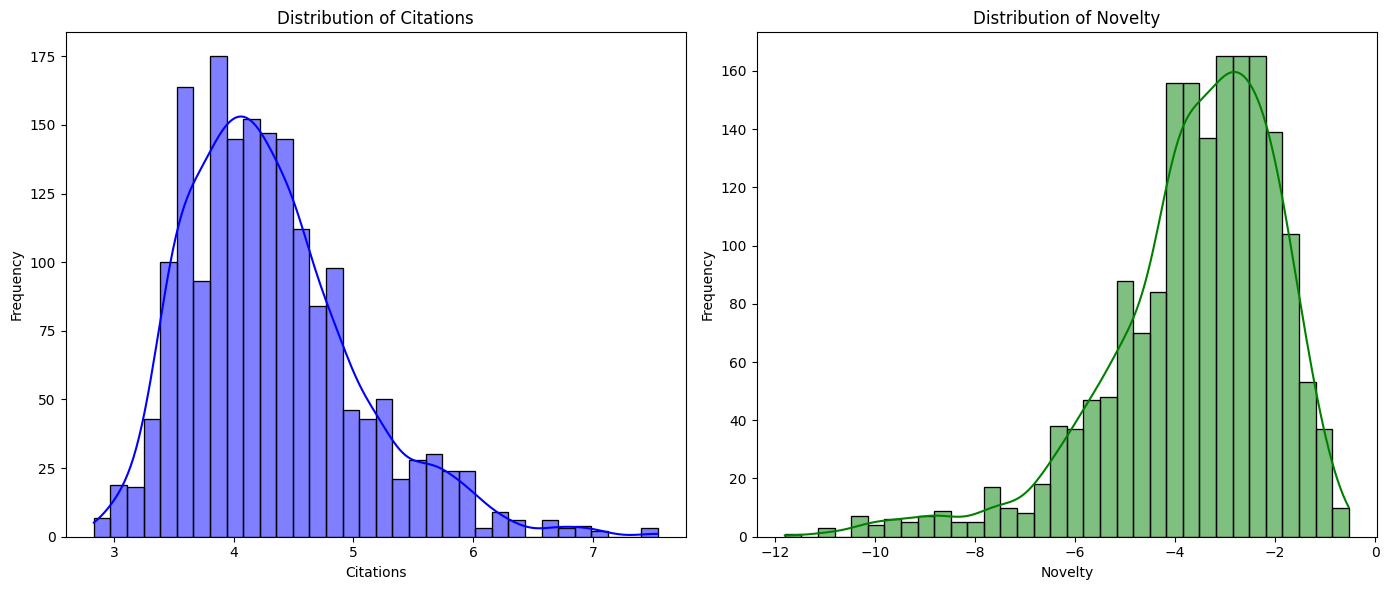

In [69]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(DF_SDG_bis['log_num_citations2'], kde=True, color='blue')
plt.xlabel('Citations')
plt.ylabel('Frequency')
plt.title('Distribution of Citations')

plt.subplot(1, 2, 2)
sns.histplot(DF_SDG_bis['Novelty'], kde=True, color='green')
plt.xlabel('Novelty')
plt.ylabel('Frequency')
plt.title('Distribution of Novelty')

plt.tight_layout()
plt.show()